# Employee Exit Survey

## The Client
TAFE and DETE are vocational colleges in Australia. They have been doing exit surveys for a while and have now gathered a dataset of about 1600 results which they would like analysed. The client is focussed on internal contributing factors.

## Aims of Analysis: Dissatisfaction
The client has asked for a report to help them understand the results of their recent exit survey.

They wish to understand the profile of employees who cite dissatisfaction as a contributing factor to their exit from the organisation.

Leadership wants to understand where to target retention improvement strategies.

# Visualisations

## Notebooks and Reports
The following notebooks and documents are part of this anaylsis:

### Jupyter Notebook Filename: Summary
- [employee_exit_survey_cleaning_1.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_1.ipynb): Columns drops, missing data, renaming columns, tidying data for consistency
- [employee_exit_survey_cleaning_2.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_2.ipynb): Adding calculated columns, adding category columns, further drops
- [employee_exit_survey_correlation.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_correlation.ipynb): Investigating correlations to guide analysis
- [employee_exit_survey_gender.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_gender.ipynb): Aggregation by pivot_table of gender subsets, visualisations
- [employee_exit_survey_age.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_age.ipynb): Aggregation by pivot_table of age subsets, visualisations
- [employee_exit_survey_conflict.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_conflict.ipynb): Exploration of conflict as a contributory factor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stye

In [2]:
survey = pd.read_csv('employee_exit_survey_clean_final.csv')

In [3]:
# Slice out the columns we want going forward
keep_cols = [
    'cf_dept_or_job_dissatisfaction',
    'cf_interpersonal_conflict',
    'gender',
    'age',
    'service_years',
    'college',
]

survey = survey[keep_cols]

In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   cf_dept_or_job_dissatisfaction  1524 non-null   bool  
 1   cf_interpersonal_conflict       1524 non-null   bool  
 2   gender                          1524 non-null   object
 3   age                             1407 non-null   object
 4   service_years                   1293 non-null   object
 5   college                         1524 non-null   object
dtypes: bool(2), object(4)
memory usage: 50.7+ KB


In [6]:
pv_gender = survey.pivot_table(values='cf_interpersonal_conflict', index='gender', aggfunc=np.sum, margins=False)
print(pv_gender)
survey['gender'].value_counts()

        cf_interpersonal_conflict
gender                           
Female                         42
Male                           19


Female    1045
Male       479
Name: gender, dtype: int64

No connection between interpersonal conflict and gender.

In [7]:
print(survey['cf_interpersonal_conflict'].value_counts())
pv_age = survey.pivot_table(values='cf_interpersonal_conflict', index='age', aggfunc=np.sum, margins=False)
print(pv_age)
survey['age'].value_counts().sort_index(ascending=True)

False    1463
True       61
Name: cf_interpersonal_conflict, dtype: int64
       cf_interpersonal_conflict
age                             
18-20                          1
21-25                          2
26-30                          4
31-35                          2
36-40                          7
41-45                          3
46-50                          8
51-55                         13
56+                           14


18-20     17
21-25     84
26-30    107
31-35     91
36-40    102
41-45    141
46-50    122
51-55    185
56+      558
Name: age, dtype: int64

In [8]:
pv_age['all'] = survey['age'].value_counts().sort_index(ascending=True)

In [9]:
pv_age.rename(columns={'cf_interpersonal_conflict':'conflict'}, inplace=True)

In [10]:
pv_age['perc'] = round(pv_age['conflict']/pv_age['all']*100)

In [11]:
pv_age

,conflict,all,perc
age,,,
18-20,1,17,6.0
21-25,2,84,2.0
26-30,4,107,4.0
31-35,2,91,2.0
36-40,7,102,7.0
41-45,3,141,2.0
46-50,8,122,7.0
51-55,13,185,7.0
56+,14,558,3.0


Small values, so conclusions have to be cautious...

But it does seem like some age groups experience high amounts of interpersonal confict compared to others - over triple.

Could be worth cross-referencing conflict to age and dissatisfaction analysis.



In [12]:
pv_service_conflict = survey.pivot_table(values='cf_interpersonal_conflict', index='service_years', aggfunc=np.sum)
pv_service_conflict

,cf_interpersonal_conflict
service_years,
1 to 2 Years,7
11 to 20 Years,7
20 Plus Years,9
3 to 4 Years,10
5 to 6 Years,6
7 to 10 Years,5
Under 1 Year,8


In [13]:
survey['service_years'].value_counts()

11 to 20 Years    234
20 Plus Years     216
Under 1 Year      213
1 to 2 Years      212
3 to 4 Years      185
7 to 10 Years     123
5 to 6 Years      110
Name: service_years, dtype: int64

In [14]:
pv_service_conflict['all'] = survey['service_years'].value_counts()
pv_service_conflict['perc_conf'] = round(pv_service_conflict['cf_interpersonal_conflict']/pv_service_conflict['all']*100)
pv_service_conflict

,cf_interpersonal_conflict,all,perc_conf
service_years,,,
1 to 2 Years,7,212,3.0
11 to 20 Years,7,234,3.0
20 Plus Years,9,216,4.0
3 to 4 Years,10,185,5.0
5 to 6 Years,6,110,5.0
7 to 10 Years,5,123,4.0
Under 1 Year,8,213,4.0


In [15]:
pv_service_diss = survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='service_years', aggfunc=np.sum)
pv_service_diss

,cf_dept_or_job_dissatisfaction
service_years,
1 to 2 Years,35
11 to 20 Years,28
20 Plus Years,39
3 to 4 Years,37
5 to 6 Years,20
7 to 10 Years,23
Under 1 Year,32


In [16]:
pv_service_diss['all'] = survey['service_years'].value_counts()
pv_service_diss['perc_diss'] = round(pv_service_diss['cf_dept_or_job_dissatisfaction']/pv_service_diss['all']*100)
pv_service_diss

,cf_dept_or_job_dissatisfaction,all,perc_diss
service_years,,,
1 to 2 Years,35,212,17.0
11 to 20 Years,28,234,12.0
20 Plus Years,39,216,18.0
3 to 4 Years,37,185,20.0
5 to 6 Years,20,110,18.0
7 to 10 Years,23,123,19.0
Under 1 Year,32,213,15.0


In [19]:
pv_service_diss['perc_conf'] = pv_service_conflict['perc_conf']
pv_service = pv_service_diss
pv_service.drop('cf_dept_or_job_dissatisfaction', axis=1, inplace=True)

                all  perc_diss  perc_conf
service_years                            
1 to 2 Years    212       17.0        3.0
11 to 20 Years  234       12.0        3.0
20 Plus Years   216       18.0        4.0
3 to 4 Years    185       20.0        5.0
5 to 6 Years    110       18.0        5.0
7 to 10 Years   123       19.0        4.0
Under 1 Year    213       15.0        4.0


<AxesSubplot:xlabel='service_years'>

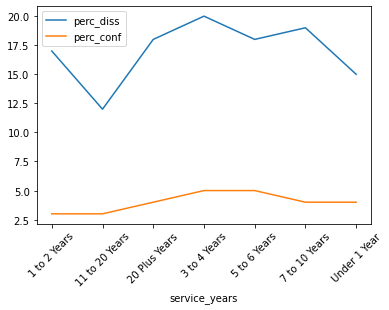

In [30]:
print(pv_service)
pv_service[['perc_diss','perc_conf']].plot(rot=45)

In [31]:
pv_service.corr()

,all,perc_diss,perc_conf
all,1.000000,-0.590364,-0.630406
perc_diss,-0.590364,1.000000,0.678401
perc_conf,-0.630406,0.678401,1.000000


Strong correlation found between interpersonal conflict / dissatisfaction and years of service. 

This means that:
- Least conflict in employees between 11 and 20 years of service.
- Highest conflict in employees between 3 and 6 years of service.
- Conflict creating biggest dissatisfied employee leavers is at 3 to 4 years service.